In [12]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility

np.random.seed(123)

## Create a dataframe with two classes (0,1)
n_samples=1000
class_n_ratio=0.9
n_class_0=int(n_samples*class_n_ratio)
n_class_1=int(n_samples-n_class_0)

In [6]:
n_class_0,n_class_1

(900, 100)

In [7]:
### Create my dataframe with imbalanced dataset

class_0=pd.DataFrame(
    {
    'feature_1' : np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2' : np.random.normal(loc=0,scale=1,size=n_class_0),
     'target'   : [0]*n_class_0
})

class_1=pd.DataFrame(
    {
    'feature_1' : np.random.normal(loc=0,scale=1,size=n_class_1),
    'feature_2' : np.random.normal(loc=0,scale=1,size=n_class_1),
     'target'   : [1]*n_class_1
})

In [8]:
class_0

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


#### Combine two dataset

In [16]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [17]:
df.tail()

,feature_1,feature_2,target
995,-0.623629,0.845701,1
996,0.239810,-1.119923,1
997,-0.868240,-0.359297,1
998,0.902006,-1.609695,1
999,0.697490,0.013570,1


In [18]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

### Upsampling

We increase the datapoints which are lesser in number so that we can feed the model with unbiased data (Almost equal proportion)

In [20]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [21]:
df_minority.shape

(100, 3)

In [22]:
df_majority.shape

(900, 3)

In [23]:
from sklearn.utils import resample

In [25]:
df_minority_updated = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [26]:
df_minority_updated.shape

(900, 3)

In [33]:
# Combine the dataset
df_upsampled=pd.concat([df_majority,df_minority_updated])
df_upsampled.shape

(1800, 3)

In [35]:
df_upsampled['target'].value_counts()

1    900
0    900
Name: target, dtype: int64

### Downsampling

In [38]:
import numpy as np

np.random.seed(123)

n_sample=1000
n_sample_ratio=0.9
n_sample_0=int(n_sample*n_sample_ratio)
n_sample_1=int(n_sample-n_sample_0)

In [40]:
n_sample_0

900

In [43]:
### Creating 2 dataframes

class_0=pd.DataFrame({
    
    'feature_1':np.random.normal(loc=0,scale=1,size=n_sample_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_sample_0),
    'target': 0*n_sample_0
}
)

class_1=pd.DataFrame({
    
    'feature_1':np.random.normal(loc=0,scale=1,size=n_sample_1),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_sample_1),
    'target': 1*n_sample_1
}
)

In [58]:
# downsampling

df_majority= df[df['target']==0]
df_minority=df[df['target']==1]

In [59]:
df_majority_updated=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)  #Replace = False since we have to downsample the data.

In [60]:
df_majority_updated.shape

(100, 3)

In [61]:
pd.concat([df_minority,df_majority_updated]).reset_index(drop=True)

,feature_1,feature_2,target
0,-0.300232,0.139033,1
1,-0.632261,0.025577,1
2,-0.204317,-0.196443,1
3,0.213696,1.312255,1
4,1.033878,1.187417,1
...,...,...,...
195,-0.168426,0.553775,0
196,-0.403366,0.081491,0
197,-0.269293,0.611238,0
198,-0.295829,0.671673,0


### Downsampling is bad because we are lossing datapoints. We should instead go for the upsampling of the dataset.

## SMOTE (Synthetic minority Oversampling technique)

This is a upsampling technique.SMOTE is a technique used in ML to address imbalanced dataset where the minority class has significantly fewer instance than the majority class. SMOTE involves generating synthetic instance of the minority class by interpolating between existing instances.

In [9]:
from sklearn.datasets import make_classification

In [10]:
X,y=make_classification(n_samples=1000,n_redundant=0,
n_features=2,n_clusters_per_class=1,
                    weights=[0.90],random_state=12)

In [13]:
## Create a dataset
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])

In [14]:
df=pd.concat([df1,df2],axis=1).reset_index(drop=True)
df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [15]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

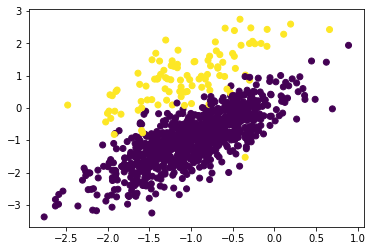

In [77]:
import matplotlib.pyplot as plt
plt.scatter(df['f1'],df['f2'],c=df['target'])   # Yellow represents the minority data points and purple represents major

In [2]:
!pip install imblearn

In [16]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [ ]:
#  IN smote, instaed of creating datapoints again and again for oversampling, smote will do interpolating by finding all the points
#  between 2 data points in such a manner to increase the data points instead of generating the same data poinst again and again

In [17]:
oversampling= SMOTE()

In [18]:
x,y=oversampling.fit_resample(df[['f1','f2']],df['target'])

In [23]:
x.shape   # 900 + 900 =1800 records

(1800, 2)

In [24]:
y.shape  # 900 + 900 =1800 records

(1800,)

In [28]:
y.value_counts()

1    900
0    900
Name: target, dtype: int64

In [33]:
df1=pd.DataFrame(x,columns =['f1','f2'])
df2=pd.DataFrame(y,columns =['target'])

,target
0,0
1,0
2,0
3,1
4,0
...,...
1795,1
1796,1
1797,1
1798,1


In [35]:
df_oversampled=pd.concat([df1,df2],axis=1)
df_oversampled.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


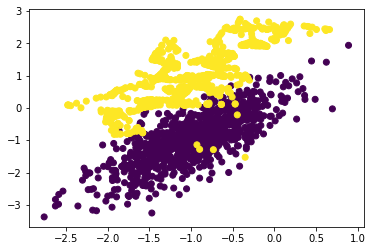

In [37]:
import  matplotlib.pyplot as plt
plt.scatter(df_oversampled['f1'],df_oversampled['f2'],c=df_oversampled['target'])  # We can see that all data points are continuous as all points considered b/w 2 data points (obtained previously)